In [ ]:
!pip install geopandas # run this for Colab, not needed for Binder

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd   

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
sixc = world[ world['continent'] != 'Antarctica' ]
asia = world[ world['continent'] == 'Asia' ]
noam = world[ world['continent'] == 'North America']
swed = world[ world['iso_a3'] == 'SWE' ]

# This works

<AxesSubplot:>

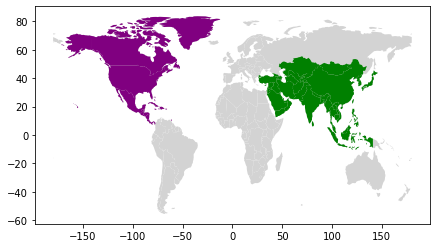

In [3]:
axes = sixc.plot(figsize=(8,4), color='lightgrey')
asia.plot(ax=axes, color='green')
noam.plot(ax=axes, color='purple')

# But adding another plot to the end breaks the figsize
Is it because the swed dataframe has only 1 row?
Is it because geopandas is racist against the Swedish?

<AxesSubplot:>

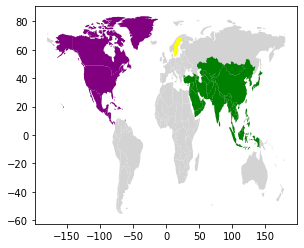

In [4]:
axes = sixc.plot(figsize=(8,4), color='lightgrey')
asia.plot(ax=axes, color='green')
noam.plot(ax=axes, color='purple')
swed.plot(ax=axes, color='yellow')

# But moving it into the middle makes it work again!

<AxesSubplot:>

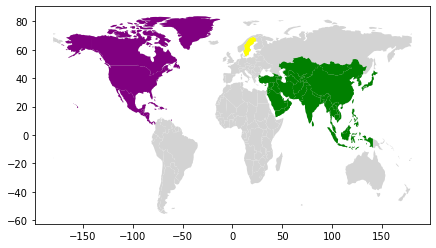

In [5]:
axes = sixc.plot(figsize=(8,4), color='lightgrey')
asia.plot(ax=axes, color='green')
swed.plot(ax=axes, color='yellow')
noam.plot(ax=axes, color='purple')

# *The Internet* to the rescue!
Generous knowledgeable people answered my question, [see here](https://stackoverflow.com/questions/65636715/jupyter-geopandas-plot-order-breaks-figsize).

What seems to be happening is that, because SWE is so small/portrait-shaped compared to the world, it is changing the aspect ratio (ratio of x/y unit scale in the plot) to be what it thinks would be good for plotting SWE.

We add an extra input to plot() to specify aspect='equal', or aspect=1, which means that the plotted scales of lon(x)/lat(y) are the same.

BTW if you'll allow me to indulge in a bit of professional nerdery, this means that the map is true at the equator, but more distorted the closer you get to the poles (exaggerated horizontal spread). But this is a well-understood, inevitable consequence of projecting a round earth onto a flat map. As always [XKCD has a fascinating infographic](xkcd.com/977). This straightforward (simplistic?) approach of simply plotting lon/lat as x/y is "Plate Carrée (Equirectangular)"

<AxesSubplot:>

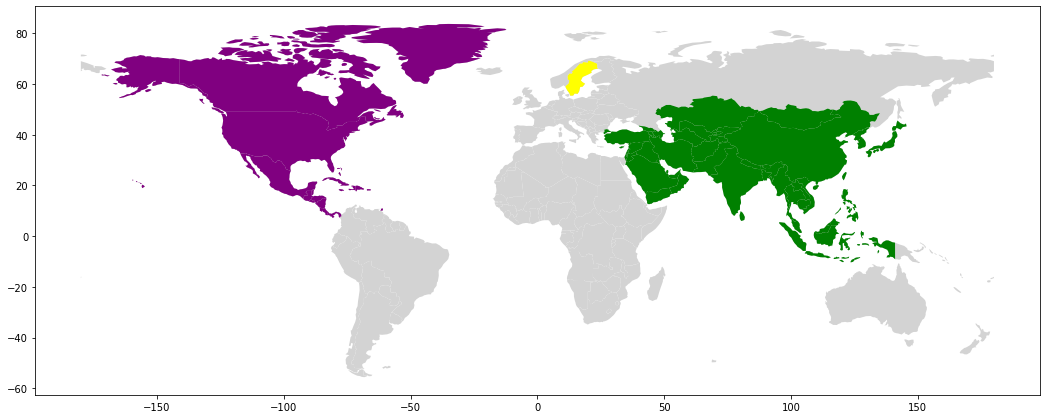

In [6]:
axes = sixc.plot(figsize=(18,10), color='lightgrey')
asia.plot(ax=axes, color='green')
noam.plot(ax=axes, color='purple')
swed.plot(ax=axes, color='yellow', aspect=1)  # it's only  needed in the last one